In [ ]:
''' Problem Statement for Your Project
Title: Real Estate Market Analysis & Pricing Trends in Delhi
Objective:
The real estate market is dynamic and influenced by various factors such as location, property size, age, and nearby amenities. This project aims to analyze real estate trends in Delhi using data science techniques to provide actionable insights on pricing, demand patterns, and investment opportunities.

Key Goals:
1. Price Analysis & Trends – Identify pricing trends based on location, property size, and amenities.

2. Demand Insights – Determine factors that increase or decrease property value.

3. Affordability Index – Analyze cost per square foot to assess affordability in different areas.

4. Investment Potential – Identify emerging high-value locations and predict potential growth.

5. Data-Driven Decision Making – Help buyers, sellers, and investors make informed decisions.'''

In [2]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt,  matplotlib.ticker as ticker

In [3]:
path = "C:\\Environment\\CA2 Project\\IndianHouses_Corrected.csv"
data = pd.read_csv(path)
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Floor_Level,Property_Age,Nearby_Amenities
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000.0,Ready_to_move,New_Property,Builder_Floor,8125.000000,3rd Floor,10-20 years,Near Metro
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000.0,Ready_to_move,New_Property,Apartment,6666.666667,2nd Floor,20+ years,NaN
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000.0,Ready_to_move,Resale,Apartment,16315.789470,Penthouse,5-10 years,Near Mall
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000.0,Ready_to_move,Resale,Builder_Floor,7000.000000,1st Floor,20+ years,Near Mall
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000.0,Ready_to_move,New_Property,Builder_Floor,9538.461538,Penthouse,20+ years,Near Hospital


In [4]:
data.info() #BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              5000 non-null   float64
 1   BHK               5000 non-null   int64  
 2   Bathroom          4992 non-null   float64
 3   Furnishing        4982 non-null   object 
 4   Locality          5000 non-null   object 
 5   Parking           4883 non-null   float64
 6   Price             5000 non-null   float64
 7   Status            5000 non-null   object 
 8   Transaction       5000 non-null   object 
 9   Type              4982 non-null   object 
 10  Per_Sqft          5000 non-null   float64
 11  Floor_Level       5000 non-null   object 
 12  Property_Age      5000 non-null   object 
 13  Nearby_Amenities  3978 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 547.0+ KB


In [5]:
print(data.isnull().sum()) #CHECKING NULL VALUES

Area                   0
BHK                    0
Bathroom               8
Furnishing            18
Locality               0
Parking              117
Price                  0
Status                 0
Transaction            0
Type                  18
Per_Sqft               0
Floor_Level            0
Property_Age           0
Nearby_Amenities    1022
dtype: int64


In [6]:
data.loc[:, 'Bathroom'] = data['Bathroom'].fillna(data['Bathroom'].mode()[0])
data.loc[:, 'Furnishing'] = data['Furnishing'].fillna('Unfurnished')
data.loc[:, 'Parking'] = data['Parking'].fillna(0)
data.loc[:, 'Type'] = data['Type'].fillna(data['Type'].mode()[0])

# Check if all missing values are handled
print(data.isnull().sum())

Area                   0
BHK                    0
Bathroom               0
Furnishing             0
Locality               0
Parking                0
Price                  0
Status                 0
Transaction            0
Type                   0
Per_Sqft               0
Floor_Level            0
Property_Age           0
Nearby_Amenities    1022
dtype: int64


In [7]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Floor_Level,Property_Age,Nearby_Amenities
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000.0,Ready_to_move,New_Property,Builder_Floor,8125.000000,3rd Floor,10-20 years,Near Metro
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000.0,Ready_to_move,New_Property,Apartment,6666.666667,2nd Floor,20+ years,NaN
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000.0,Ready_to_move,Resale,Apartment,16315.789470,Penthouse,5-10 years,Near Mall
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000.0,Ready_to_move,Resale,Builder_Floor,7000.000000,1st Floor,20+ years,Near Mall
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000.0,Ready_to_move,New_Property,Builder_Floor,9538.461538,Penthouse,20+ years,Near Hospital


In [8]:
duplicate_count = data.duplicated().sum()
print(duplicate_count)

0


In [9]:
print(data.dtypes)

Area                float64
BHK                   int64
Bathroom            float64
Furnishing           object
Locality             object
Parking             float64
Price               float64
Status               object
Transaction          object
Type                 object
Per_Sqft            float64
Floor_Level          object
Property_Age         object
Nearby_Amenities     object
dtype: object


In [10]:
 #discrete values converted from float into integer
data['Bathroom'] = data['Bathroom'].astype(int)
data['Parking'] = data['Parking'].astype(int)
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Floor_Level,Property_Age,Nearby_Amenities
0,800.0,3,2,Semi-Furnished,Rohini Sector 25,1,6500000.0,Ready_to_move,New_Property,Builder_Floor,8125.000000,3rd Floor,10-20 years,Near Metro
1,750.0,2,2,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1,5000000.0,Ready_to_move,New_Property,Apartment,6666.666667,2nd Floor,20+ years,NaN
2,950.0,2,2,Furnished,"Citizen Apartment, Rohini Sector 13",1,15500000.0,Ready_to_move,Resale,Apartment,16315.789470,Penthouse,5-10 years,Near Mall
3,600.0,2,2,Semi-Furnished,Rohini Sector 24,1,4200000.0,Ready_to_move,Resale,Builder_Floor,7000.000000,1st Floor,20+ years,Near Mall
4,650.0,2,2,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1,6200000.0,Ready_to_move,New_Property,Builder_Floor,9538.461538,Penthouse,20+ years,Near Hospital


In [11]:
print(data.describe()) #summary of numerical columns

               Area          BHK     Bathroom      Parking         Price  \
count   5000.000000  5000.000000  5000.000000  5000.000000  5.000000e+03   
mean    1454.385790     2.802400     2.576400     1.816000  2.134261e+07   
std     1493.927448     0.956419     1.032849     5.581324  2.567374e+07   
min       26.459248     1.000000     1.000000     0.000000  9.029392e+05   
25%      800.000000     2.000000     2.000000     1.000000  5.674802e+06   
50%     1200.000000     3.000000     2.000000     1.000000  1.400000e+07   
75%     1700.000000     3.000000     3.000000     2.000000  2.600000e+07   
max    25805.175360    10.000000     7.000000   114.000000  2.635827e+08   

            Per_Sqft  
count    5000.000000  
mean    14977.847189  
std     21189.205040  
min       167.892310  
25%      6871.730484  
50%     11610.933835  
75%     17573.853012  
max    538461.538500  


In [12]:
# Summary of object (categorical) columns
print(data.describe(include='object'))

            Furnishing                                Locality         Status  \
count             5000                                    5000           5000   
unique               3                                     365              2   
top     Semi-Furnished  J R Designers Floors, Rohini Sector 24  Ready_to_move   
freq              2804                                     141           4688   

       Transaction           Type Floor_Level Property_Age Nearby_Amenities  
count         5000           5000        5000         5000             3978  
unique           2              2           5            4                4  
top         Resale  Builder_Floor   3rd Floor   5-10 years    Near Hospital  
freq          3126           2639        1025         1315             1003  


In [69]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]


numeric_cols = ['Price', 'Area', 'Per_Sqft']


data_no_outliers = data.copy()

for col in numeric_cols:
    data_no_outliers = remove_outliers_iqr(data_no_outliers, col)


print("Original data shape:", data.shape)
print("After outlier removal:", data_no_outliers.shape)


Original data shape: (5000, 14)
After outlier removal: (4360, 14)


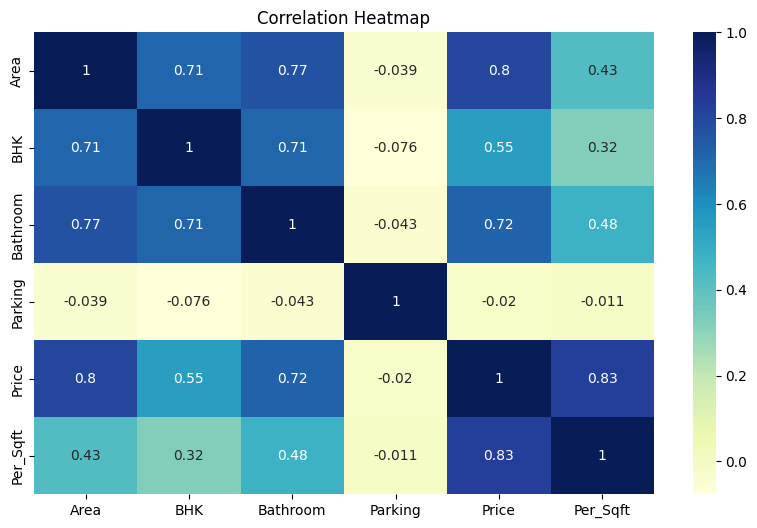

In [70]:
# HEATMAP TO SHOW RELATION BETWEEN EVERY NUMERIC ATTRIBUTES

plt.figure(figsize=(10, 6))
sns.heatmap(data_no_outliers.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

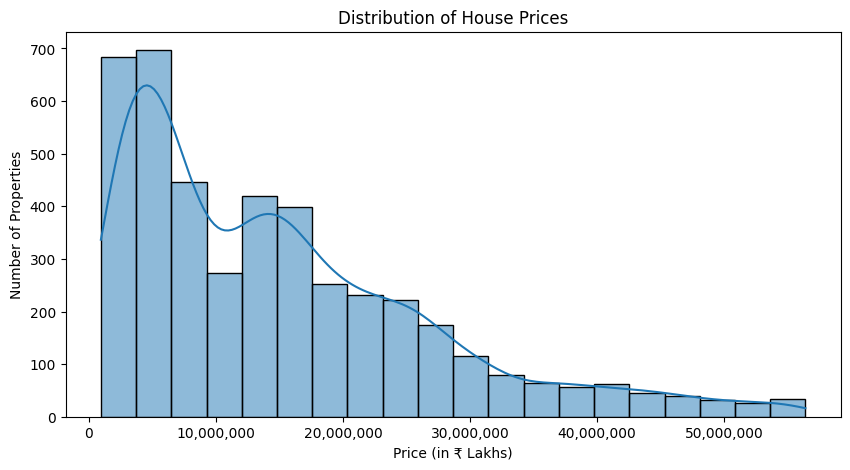

In [71]:
# HISTOGRAM PLOT TO SHOW RELATION BETWEEN NUMBER OF PROPERTIES VS PRICES

plt.figure(figsize=(10, 5))
sns.histplot(data_no_outliers['Price'] / 1e5, bins=20, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price (in ₹ Lakhs)")
plt.ylabel("Number of Properties")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x * 1e5):,}'))
plt.show()

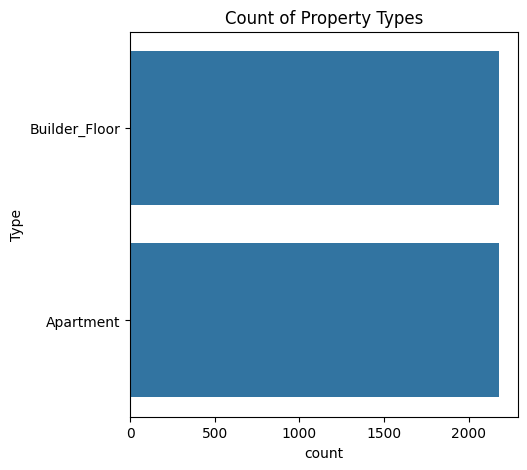

In [72]:
# NUMBER OF PROPERTIES VS PROPERTY TYPES

plt.figure(figsize=(5, 5))
sns.countplot(data_no_outliers['Type'])
plt.title("Count of Property Types")
plt.xticks(rotation=0)
plt.show()

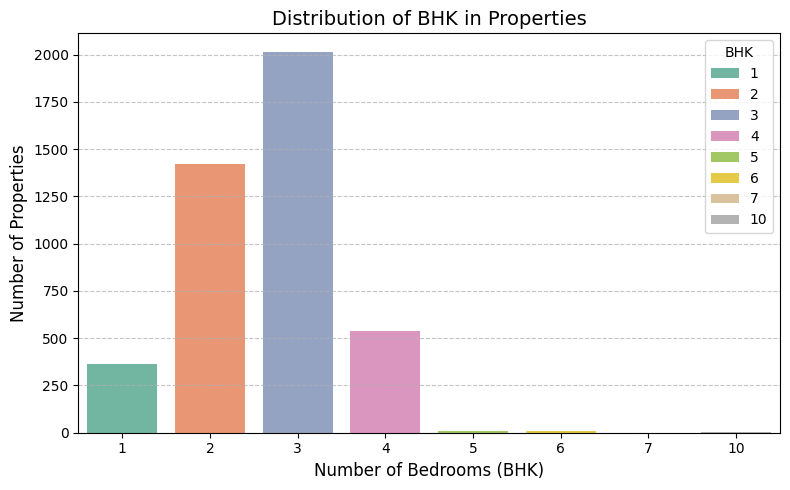

In [73]:
# NUMBER OF PROPERTIES VS BHK

plt.figure(figsize=(8, 5))
sns.countplot(x='BHK', hue='BHK', legend=True, data=data_no_outliers, palette='Set2')

plt.title("Distribution of BHK in Properties", fontsize=14)
plt.xlabel("Number of Bedrooms (BHK)", fontsize=12)
plt.ylabel("Number of Properties", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.75)
plt.tight_layout()
plt.show()

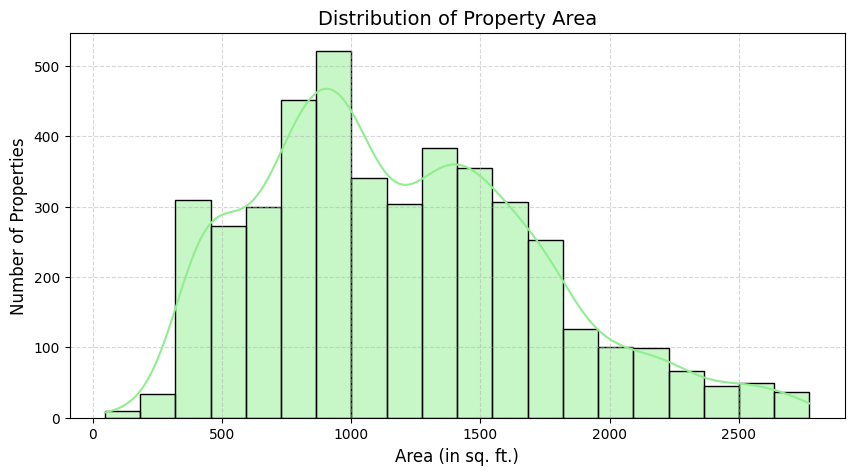

In [86]:
# NUMBER OF PROPERTIES VS AREA

plt.figure(figsize=(10, 5))
sns.histplot(data_no_outliers['Area'], bins=20, kde=True, color='lightgreen')

plt.title("Distribution of Property Area", fontsize=14)
plt.xlabel("Area (in sq. ft.)", fontsize=12)
plt.ylabel("Number of Properties", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

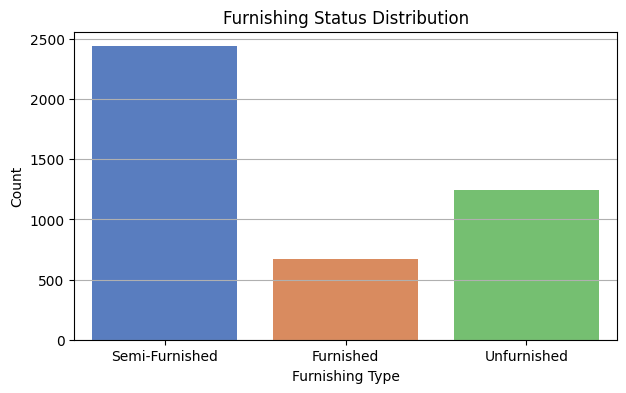

In [95]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Furnishing', data=data_no_outliers, hue='Furnishing', palette='muted')
plt.title("Furnishing Status Distribution")
plt.xlabel("Furnishing Type")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

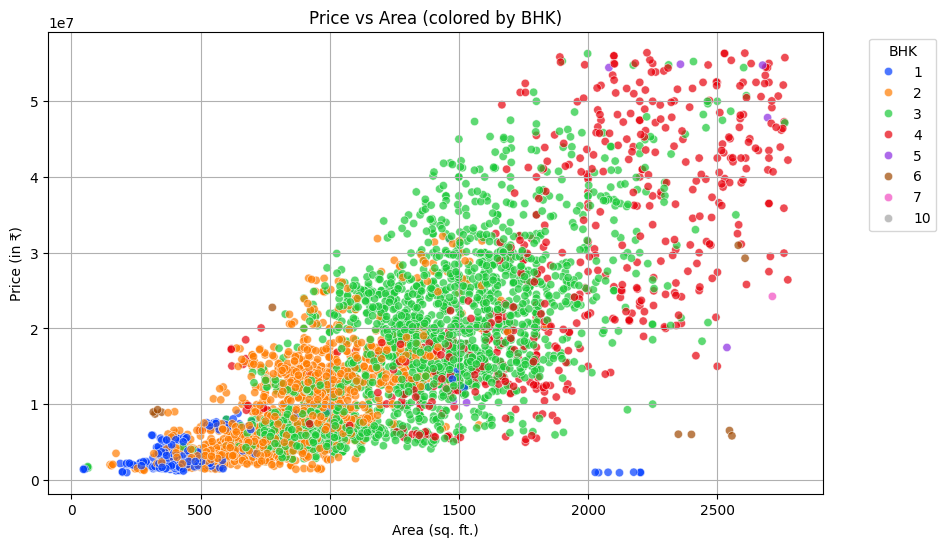

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', data=data_no_outliers, hue='BHK', palette='bright', alpha=0.7)
plt.title("Price vs Area (colored by BHK)")
plt.xlabel("Area (sq. ft.)")
plt.ylabel("Price (in ₹)")
plt.legend(title="BHK", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()